In [414]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline
%matplotlib inline

In [415]:
df_pl=pd.read_csv('final_data.csv')

In [416]:
correlation = df_pl.corr(numeric_only=True)
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.834553
minutes played         0.420542
appearance             0.419656
award                  0.300454
assists                0.137415
games_injured          0.135654
goals                  0.121574
days_injured           0.107686
position_encoded       0.085154
height                 0.040535
winger                 0.005034
red cards             -0.010171
clean sheets          -0.011684
yellow cards          -0.011766
second yellow cards   -0.013889
age                   -0.050156
goals conceded        -0.063529
Name: current_value, dtype: float64


In [417]:
df_pl

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [418]:
correlation = df_pl.corr(numeric_only=True)
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.834553
minutes played         0.420542
appearance             0.419656
award                  0.300454
assists                0.137415
games_injured          0.135654
goals                  0.121574
days_injured           0.107686
position_encoded       0.085154
height                 0.040535
winger                 0.005034
red cards             -0.010171
clean sheets          -0.011684
yellow cards          -0.011766
second yellow cards   -0.013889
age                   -0.050156
goals conceded        -0.063529
Name: current_value, dtype: float64


In [419]:
df_pl.duplicated().sum()

0

In [420]:
df_pl.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [421]:
df_pl.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [422]:
df_pl=df_pl.drop(['player'], axis=1)

In [423]:
df_pl.head(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0


In [424]:
df_pl.sort_values(by='highest_value' , ascending=False).head() 

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2644,Paris Saint-Germain,Kylian Mbappé,Attack Centre-Forward,178.0,24.0,89,0.963082,0.433387,0.204655,0.00000,...,0.0,0.0,7476,139,23,37,180000000,200000000,4,0
2643,Paris Saint-Germain,Lionel Messi,Attack-RightWinger,170.0,35.0,75,0.442464,0.483945,0.013827,0.00000,...,0.0,0.0,6509,167,30,92,45000000,180000000,4,1
2642,Paris Saint-Germain,Neymar,Attack-LeftWinger,175.0,31.0,57,0.594883,0.479744,0.383795,0.01919,...,0.0,0.0,4690,419,67,35,70000000,180000000,4,1
453,Manchester City,Erling Haaland,Attack Centre-Forward,195.0,22.0,83,1.118270,0.234699,0.124252,0.00000,...,0.0,0.0,6519,204,36,17,170000000,170000000,4,0
527,Chelsea FC,Raheem Sterling,Attack-LeftWinger,170.0,28.0,85,0.414233,0.207116,0.111524,0.00000,...,0.0,0.0,5649,284,34,13,60000000,160000000,4,1


In [425]:
df_pl.dtypes

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [426]:
categorical_features=['team','name','position']
numeric_features=['position',  'height',  'age' , 'appearance' ,'goals',  'assists',  'yellow', 'cards', 'second', 'yellow cards',
 'red cards',  'goals conceded' ,'clean sheet', 'minutes played' ,'days_injured',  'games_injured'  , 'award' ,'current_value',
 'highest_value' , 'position_encoded' ,'winger' ]

In [427]:
Q1 = df_pl['highest_value'].quantile(0.25)
Q3 = df_pl['highest_value'].quantile(0.75)
IQR = Q3 - Q1
df_pl2 = df_pl[(df_pl['highest_value'] >= Q1 - 1.5 * IQR) & (df_pl['highest_value'] <= Q3 + 1.5 * IQR)]

df_pl2


,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
8,Manchester United,Teden Mengi,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
20,Manchester United,Zidane Iqbal,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,...,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
21,Manchester United,Kobbie Mainoo,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,...,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
28,Manchester United,Facundo Pellistri,Attack-RightWinger,174.000000,21.0,34,0.000000,0.087379,0.262136,0.0,...,0.000000,0.000000,1030,90,15,1,3000000,7000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


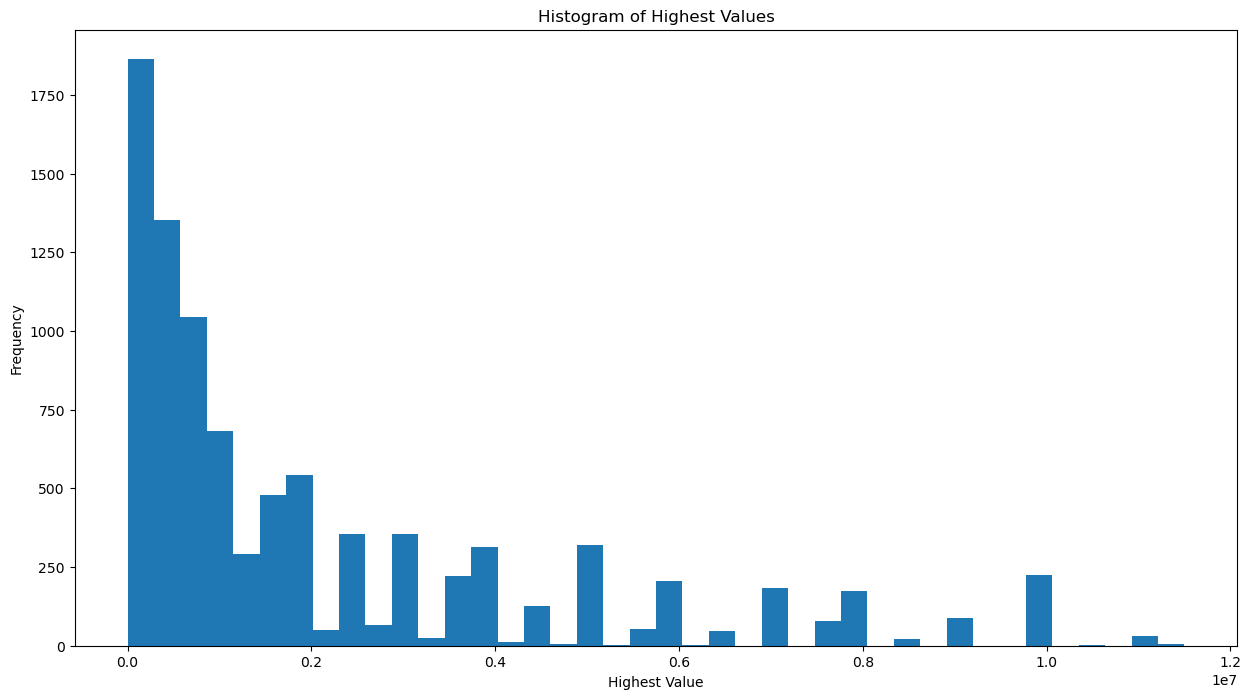

In [428]:
plt.figure(figsize=(15,8))

plt.hist(df_pl2['highest_value'], bins=40)                         
plt.xlabel('Highest Value')
plt.ylabel('Frequency')
plt.title('Histogram of Highest Values')
plt.show()

In [429]:
Q1 = df_pl['highest_value'].quantile(0.25)
Q3 = df_pl['highest_value'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['highest_value'] >= Q1 - 1.5 * IQR) & (df_pl['highest_value'] <= Q3 + 1.5 * IQR)]

In [430]:
df_pl.sort_values(by='highest_value' , ascending=False).head() 

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2654,AZ Alkmaar,Bruno Martins Indi,Defender Centre-Back,185.0,31.0,59,0.034377,0.017189,0.137510,0.00000,...,0.0,0.0,5236,425,67,1,2200000,11500000,2,0
1878,Hellas Verona,Miguel Veloso,midfield-DefensiveMidfield,181.0,37.0,46,0.000000,0.134882,0.370925,0.03372,...,0.0,0.0,2669,444,68,9,700000,11500000,3,0
1373,Real Valladolid CF,Cyle Larin,Attack Centre-Forward,188.0,28.0,70,0.366292,0.086186,0.237012,0.00000,...,0.0,0.0,4177,85,10,5,8000000,11500000,4,0
6294,Fenerbahce,Irfan Can Kahveci,Attack-RightWinger,176.0,27.0,71,0.230340,0.272220,0.314100,0.00000,...,0.0,0.0,4298,212,44,2,6500000,11500000,4,1
1829,US Lecce,Rémi Oudin,Attack-RightWinger,183.0,26.0,64,0.206557,0.147541,0.236066,0.00000,...,0.0,0.0,3050,0,0,0,4000000,11000000,4,1


In [431]:
Q1 = df_pl['goals'].quantile(0.25)
Q3 = df_pl['goals'].quantile(0.75)
IQR = Q3 - Q1
df_pl2 = df_pl[(df_pl['goals'] >= Q1 - 1.5 * IQR) & (df_pl['goals'] <= Q3 + 1.5 * IQR)]

df_pl2

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
8,Manchester United,Teden Mengi,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
20,Manchester United,Zidane Iqbal,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,...,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
21,Manchester United,Kobbie Mainoo,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,...,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
28,Manchester United,Facundo Pellistri,Attack-RightWinger,174.000000,21.0,34,0.000000,0.087379,0.262136,0.0,...,0.000000,0.000000,1030,90,15,1,3000000,7000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [432]:
Q1 = df_pl['goals'].quantile(0.25)
Q3 = df_pl['goals'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['goals'] >= Q1 - 1.5 * IQR) & (df_pl['goals'] <= Q3 + 1.5 * IQR)]

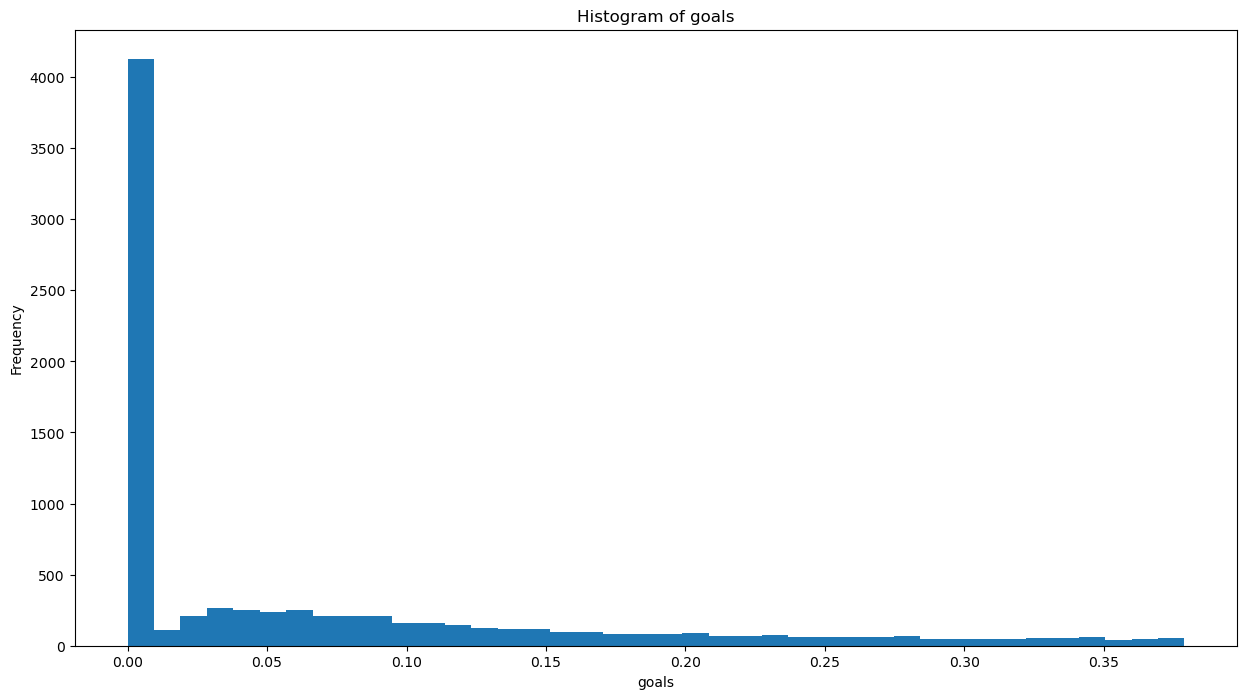

In [433]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['goals'], bins=40)                         
plt.xlabel('goals')
plt.ylabel('Frequency')
plt.title('Histogram of goals')
plt.show()

In [434]:
df_pl['current_value'].value_counts

<bound method IndexOpsMixin.value_counts of 2         600000
8        2000000
20        800000
21        800000
28       3000000
          ...   
10749      75000
10750     300000
10751      50000
10752      50000
10753      25000
Name: current_value, Length: 8468, dtype: int64>

In [435]:
Q1 = df_pl['current_value'].quantile(0.25)
Q3 = df_pl['current_value'].quantile(0.75)
IQR = Q3 - Q1
df_pl3=df_pl[(df_pl['current_value'] >= Q1 - 1.5 * IQR) & (df_pl['current_value'] <= Q3 + 1.5 * IQR)]
df_pl3

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
8,Manchester United,Teden Mengi,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
20,Manchester United,Zidane Iqbal,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,...,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
21,Manchester United,Kobbie Mainoo,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,...,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
28,Manchester United,Facundo Pellistri,Attack-RightWinger,174.000000,21.0,34,0.000000,0.087379,0.262136,0.0,...,0.000000,0.000000,1030,90,15,1,3000000,7000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


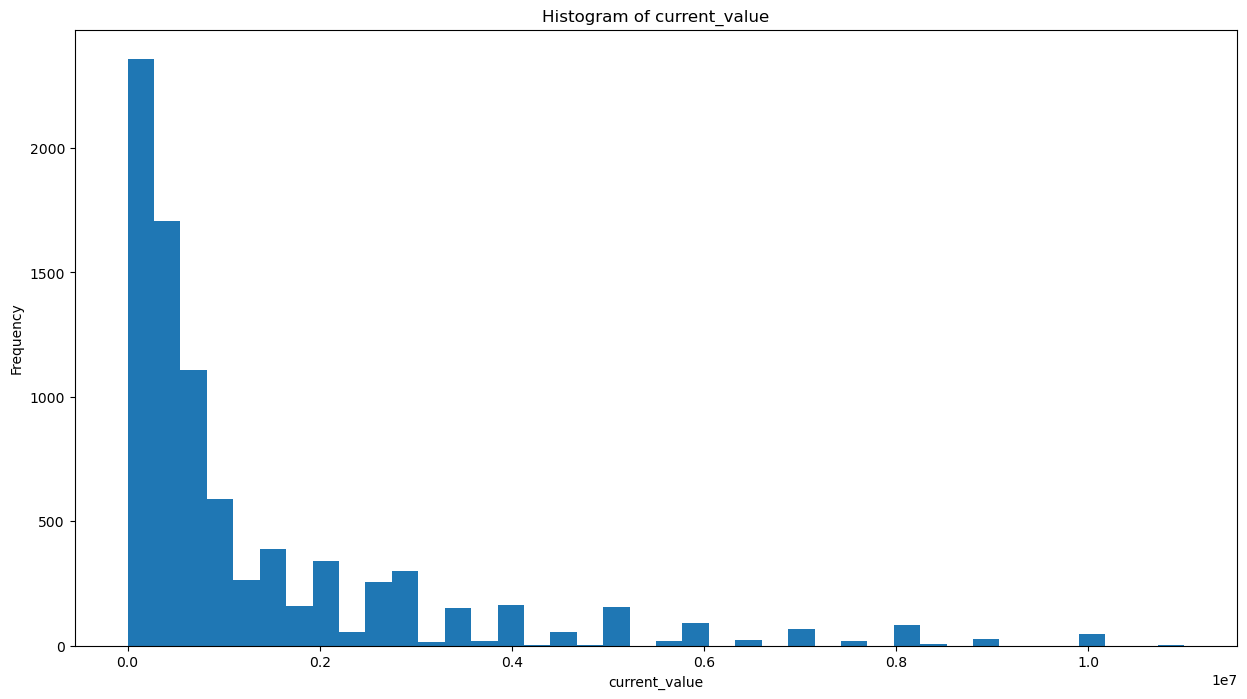

In [436]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['current_value'], bins=40)                         
plt.xlabel('current_value')
plt.ylabel('Frequency')
plt.title('Histogram of current_value')
plt.show()

In [437]:
Q1 = df_pl['current_value'].quantile(0.25)
Q3 = df_pl['current_value'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['current_value'] >= Q1 - 1.5 * IQR) & (df_pl['current_value'] <= Q3 + 1.5 * IQR)]

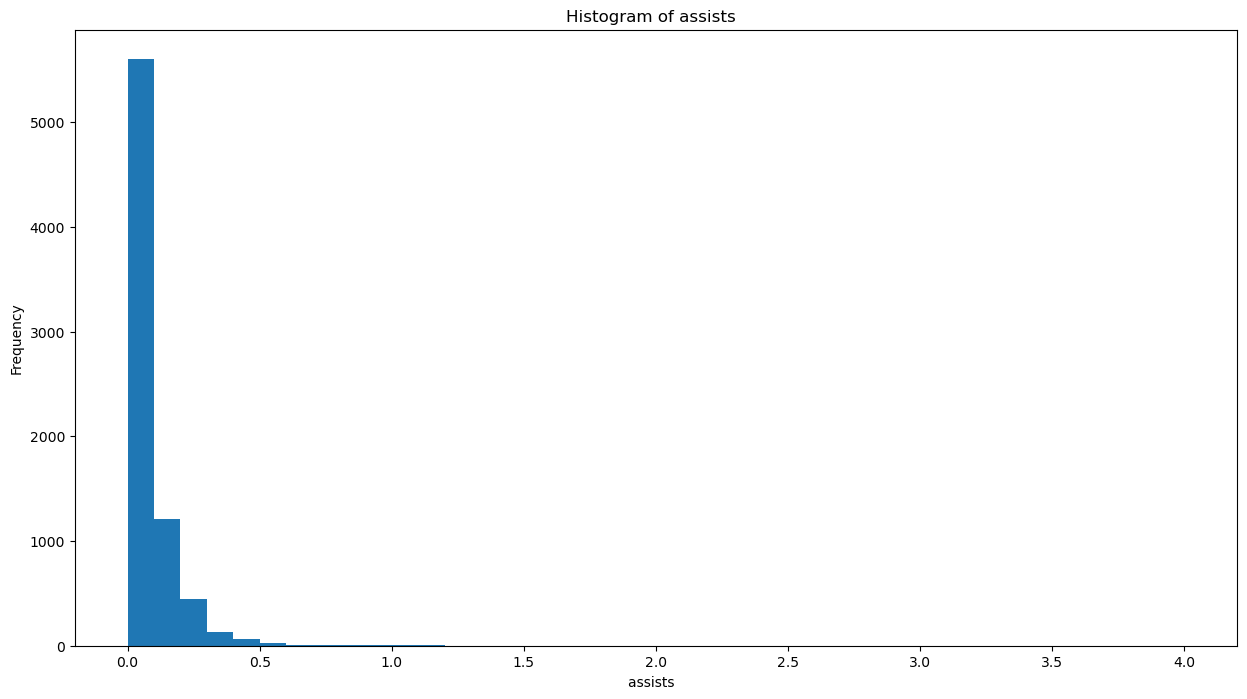

In [438]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['assists'], bins=40)                         
plt.xlabel('assists  ')
plt.ylabel('Frequency')
plt.title('Histogram of assists  ')
plt.show()

In [439]:
Q1 = df_pl['assists'].quantile(0.25)
Q3 = df_pl['assists'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['assists'] >= Q1 - 1.5 * IQR) & (df_pl['assists'] <= Q3 + 1.5 * IQR)]

In [440]:
df_pl

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
8,Manchester United,Teden Mengi,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
20,Manchester United,Zidane Iqbal,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,...,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
21,Manchester United,Kobbie Mainoo,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,...,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
28,Manchester United,Facundo Pellistri,Attack-RightWinger,174.000000,21.0,34,0.000000,0.087379,0.262136,0.0,...,0.000000,0.000000,1030,90,15,1,3000000,7000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


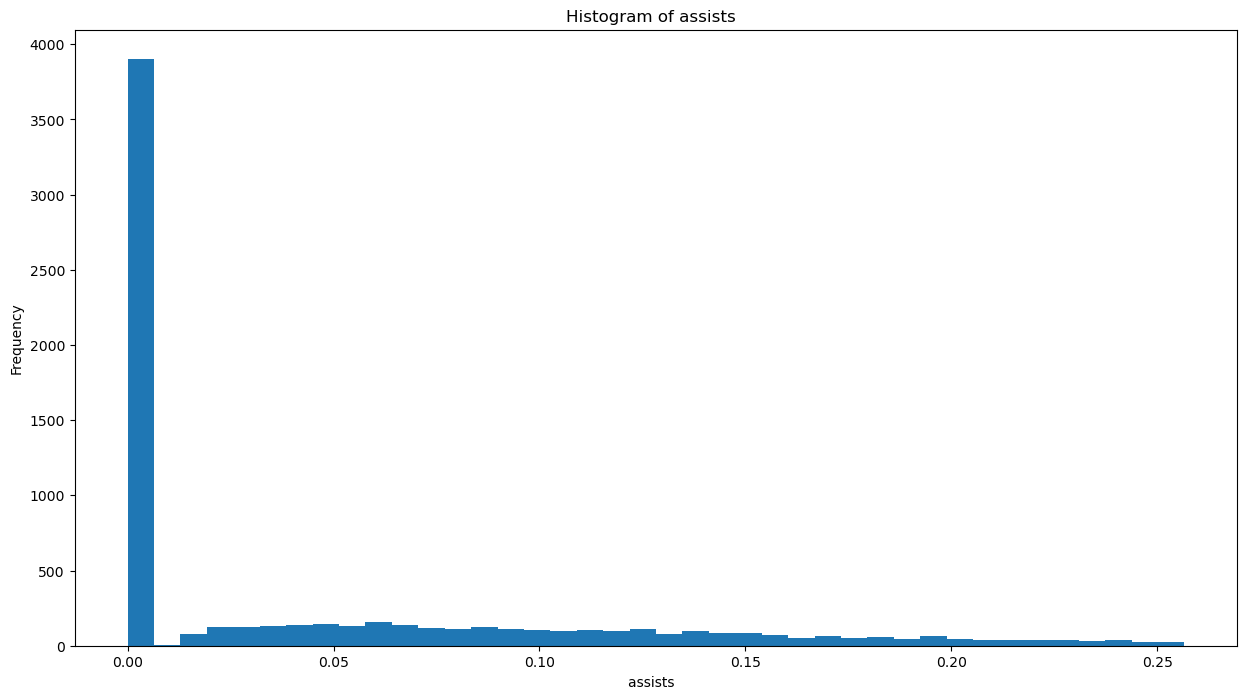

In [441]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['assists'], bins=40)                         
plt.xlabel('assists  ')
plt.ylabel('Frequency')
plt.title('Histogram of assists  ')
plt.show()

In [442]:
Q1 = df_pl['height'].quantile(0.25)
Q3 = df_pl['height'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['height'] >= Q1 - 1.5 * IQR) & (df_pl['height'] <= Q3 + 1.5 * IQR)]

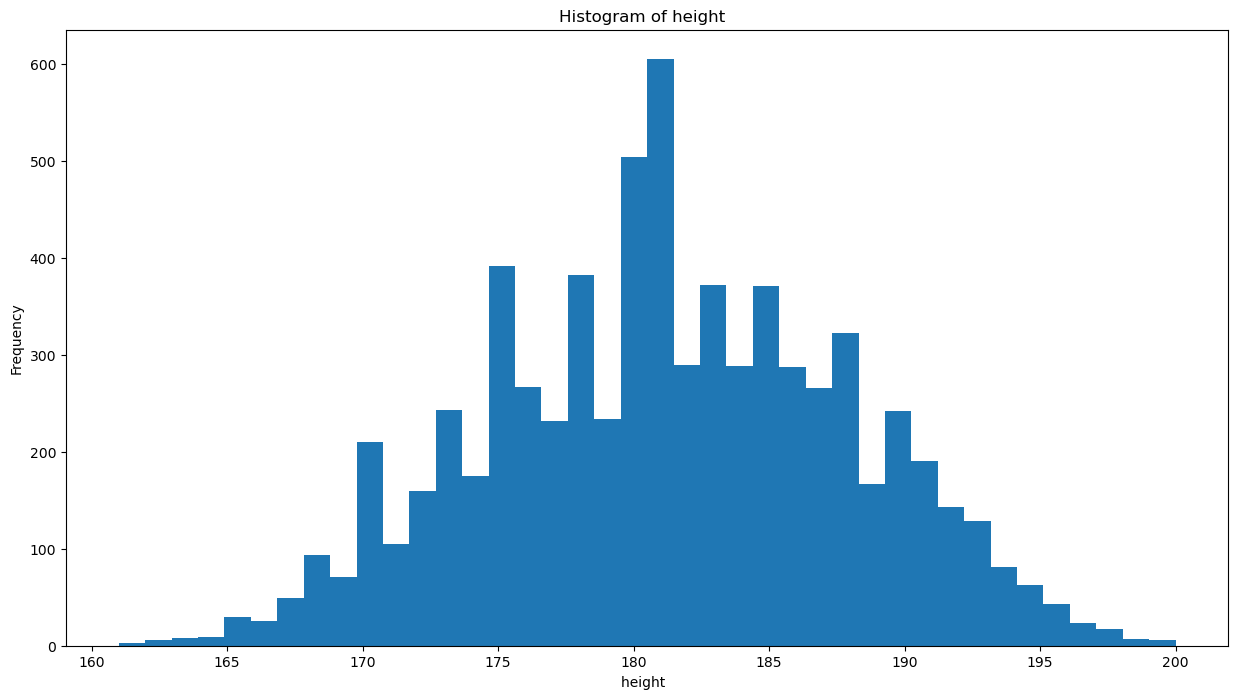

In [443]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['height'], bins=40)                         
plt.xlabel('height  ')
plt.ylabel('Frequency')
plt.title('Histogram of height  ')
plt.show()

In [444]:
Q1 = df_pl['appearance'].quantile(0.25)
Q3 = df_pl['appearance'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['appearance'] >= Q1 - 1.5 * IQR) & (df_pl['appearance'] <= Q3 + 1.5 * IQR)]

In [445]:
df_pl

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
2,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
8,Manchester United,Teden Mengi,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
20,Manchester United,Zidane Iqbal,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,...,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
21,Manchester United,Kobbie Mainoo,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,...,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
28,Manchester United,Facundo Pellistri,Attack-RightWinger,174.000000,21.0,34,0.000000,0.087379,0.262136,0.0,...,0.000000,0.000000,1030,90,15,1,3000000,7000000,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


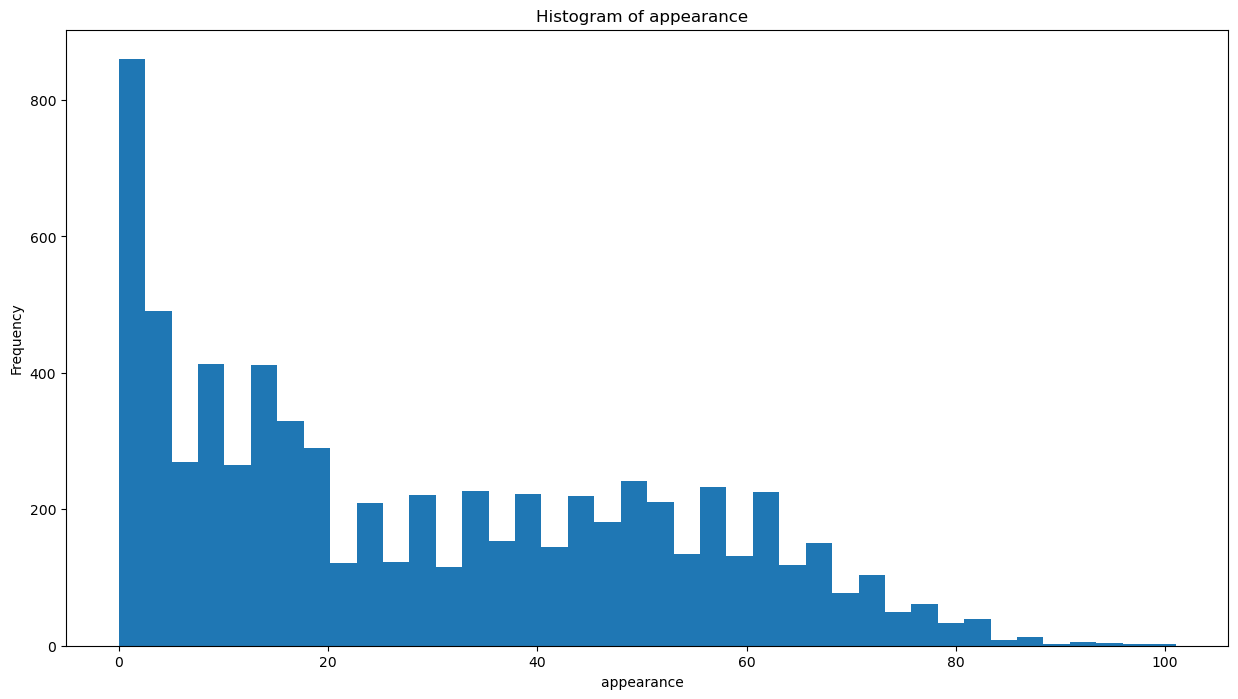

In [446]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['appearance'], bins=40)                         
plt.xlabel('appearance  ')
plt.ylabel('Frequency')
plt.title('Histogram of appearance  ')
plt.show()

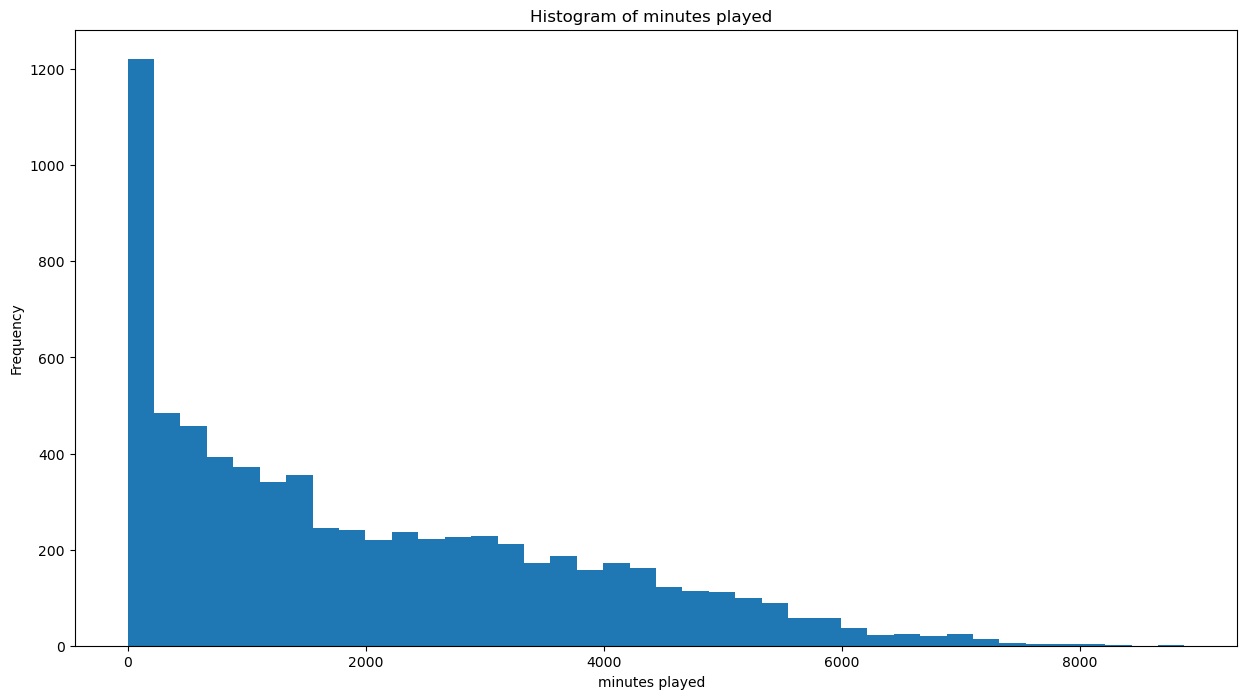

In [447]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['minutes played'], bins=40)                         
plt.xlabel('minutes played  ')
plt.ylabel('Frequency')
plt.title('Histogram of minutes played  ')
plt.show()

In [448]:
Q1 = df_pl['days_injured'].quantile(0.25)
Q3 = df_pl['days_injured'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['days_injured'] >= Q1 - 1.5 * IQR) & (df_pl['days_injured'] <= Q3 + 1.5 * IQR)]

In [449]:
Q1 = df_pl['games_injured'].quantile(0.25)
Q3 = df_pl['games_injured'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['games_injured'] >= Q1 - 1.5 * IQR) & (df_pl['games_injured'] <= Q3 + 1.5 * IQR)]

In [450]:
Q1 = df_pl['award'].quantile(0.25)
Q3 = df_pl['award'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['award'] >= Q1 - 1.5 * IQR) & (df_pl['award'] <= Q3 + 1.5 * IQR)]

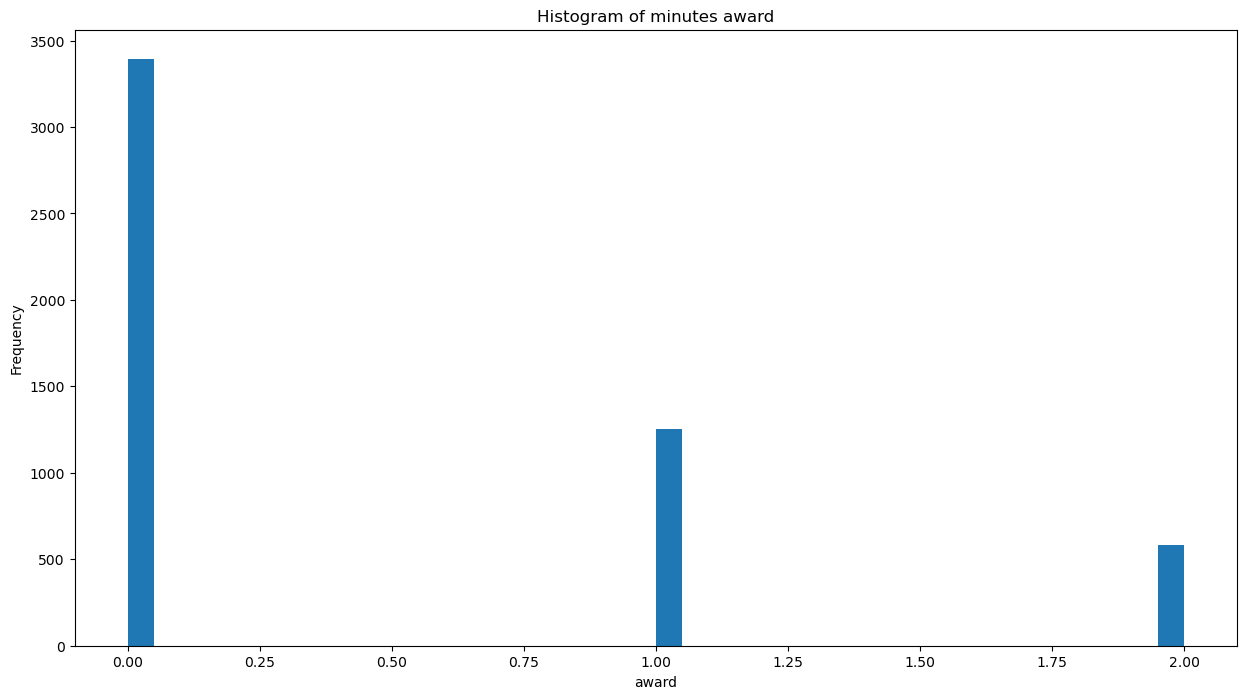

In [451]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['award'], bins=40)                         
plt.xlabel('award')
plt.ylabel('Frequency')
plt.title('Histogram of minutes award')
plt.show()

In [452]:
Q1 = df_pl['position_encoded'].quantile(0.25)
Q3 = df_pl['position_encoded'].quantile(0.75)
IQR = Q3 - Q1
df_pl=df_pl[(df_pl['position_encoded'] >= Q1 - 1.5 * IQR) & (df_pl['position_encoded'] <= Q3 + 1.5 * IQR)]

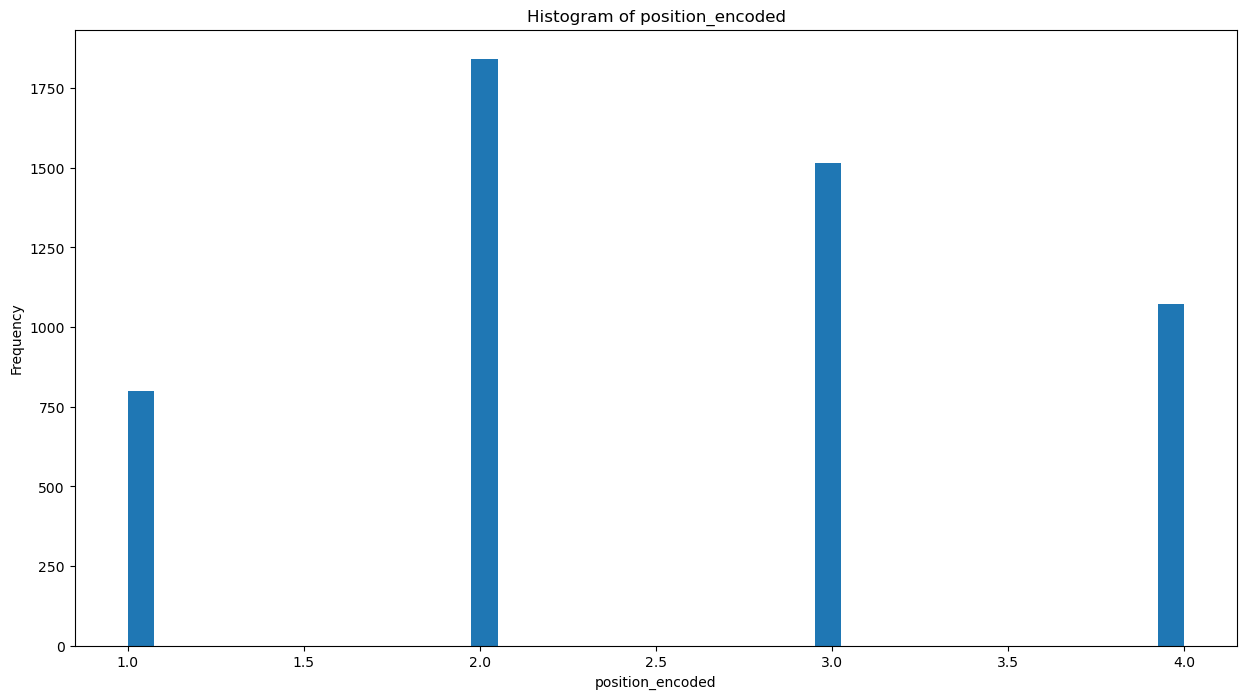

In [453]:
plt.figure(figsize=(15,8))

plt.hist(df_pl['position_encoded'], bins=40)                         
plt.xlabel('position_encoded')
plt.ylabel('Frequency')
plt.title('Histogram of position_encoded')
plt.show()

In [454]:
df_pl

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
8,Manchester United,Teden Mengi,Defender Centre-Back,186.000000,21.0,34,0.000000,0.000000,0.130529,0.0,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
20,Manchester United,Zidane Iqbal,midfield-CentralMidfield,181.000000,20.0,39,0.129125,0.064562,0.225968,0.0,...,0.000000,0.000000,2788,0,0,1,800000,800000,3,0
21,Manchester United,Kobbie Mainoo,midfield-CentralMidfield,175.000000,18.0,51,0.153759,0.102506,0.000000,0.0,...,0.000000,0.000000,3512,0,0,1,800000,800000,3,0
28,Manchester United,Facundo Pellistri,Attack-RightWinger,174.000000,21.0,34,0.000000,0.087379,0.262136,0.0,...,0.000000,0.000000,1030,90,15,1,3000000,7000000,4,1
55,Leicester City,Daniel Iversen,Goalkeeper,191.000000,25.0,65,0.000000,0.000000,0.015340,0.0,...,1.257883,0.291461,5867,0,0,0,2000000,2000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [455]:
categorical_features

['team', 'name', 'position']

In [456]:
df_pl = pd.get_dummies(df_pl, columns=categorical_features)

In [457]:
p35 = df_pl['current_value'].quantile(0.35)
p75 = df_pl['current_value'].quantile(0.75)

# Function to categorize prices
def current_value(current_value):
    if current_value < p35:
        return 'low value'
    elif current_value < p75:
        return 'moderate value'
    else:
        return 'High value'

# Apply the function to create a new column
df_pl['value_category'] = df_pl['current_value'].apply(current_value)

df_pl.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df_pl['value_category'].value_counts())

value_category
moderate value    2167
low value         1738
High value        1323
Name: count, dtype: int64


In [458]:
encoder = LabelEncoder()
df_pl['value_category'] = encoder.fit_transform(df_pl['value_category'])

In [459]:
df_pl.shape

(5228, 5585)

In [460]:
correlation = df_pl.corr(numeric_only=True)
print(correlation['value_category'].sort_values(ascending=False))

value_category              1.000000
age                         0.088232
team_Torpedo Moscow         0.053685
team_FC Vizela              0.049614
team_Excelsior Rotterdam    0.047232
                              ...   
assists                    -0.061540
team_Sporting CP           -0.063481
minutes played             -0.109215
appearance                 -0.112183
highest_value              -0.405849
Name: value_category, Length: 5585, dtype: float64


In [461]:

threshold = 0.1

selected_features = correlation[abs(correlation['value_category']) > threshold]['value_category'].index
selected_features

Index(['appearance', 'minutes played', 'highest_value', 'value_category'], dtype='object')

In [462]:
selected_features=['appearance', 'minutes played', 'highest_value', 'value_category']

In [463]:
df_pl = df_pl[selected_features]
df_pl.head()

,appearance,minutes played,highest_value,value_category
8,34,2758,2000000,0
20,39,2788,800000,2
21,51,3512,800000,2
28,34,1030,7000000,0
55,65,5867,2000000,0


In [464]:
X = df_pl.drop(['value_category'], axis=1)
y = df_pl['value_category']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [465]:
X.shape

(5228, 3)

In [466]:
svm_classifier = SVC() 

In [467]:
param_grid = {
    'kernel': [
             # 'linear',
               'rbf',
             # 'poly'
              ],   # Regularization strength
    'C':[0, 2, 5, 10, 15, 20, 25],
    'gamma': [1,2,6]
}
grid_search = GridSearchCV(estimator=svm_classifier,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)


In [468]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0, 2, 5, 10, 15, 20, 25], 'gamma': [1, 2, 6],
                         'kernel': ['rbf']},
             scoring='f1_macro', verbose=1)

In [469]:
grid_search.best_params_


{'C': 20, 'gamma': 2, 'kernel': 'rbf'}

In [470]:
model = grid_search.best_estimator_


In [471]:
y_pred = model.predict(X_test_scaled)

In [472]:
print(model.intercept_) 

[ 0.70047609  0.07556782 -0.10257305]


In [473]:
base_model = round(df_pl['value_category'].value_counts()[1]/df_pl.shape[0]*100, 2)
base_model

33.24

In [474]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8231357552581262

In [475]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.8522238163558106

In [476]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[232,   0,  25],
       [  8, 281,  52],
       [ 87,  13, 348]], dtype=int64)

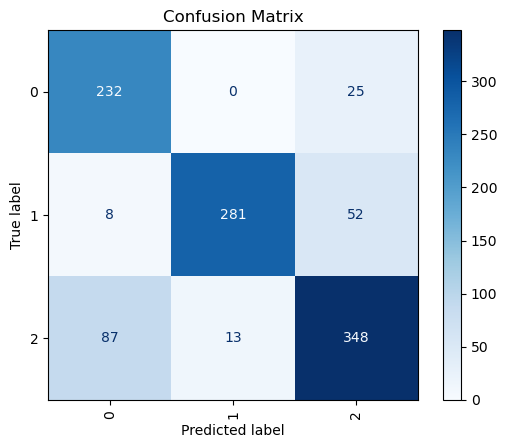

In [477]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [478]:
precision_train = precision_score(y_train, y_pred_train, average='macro')
print(f"Precision in train: {precision_train:.2f}")

# Test score
precision_test = precision_score(y_test, y_pred, average='macro')
print(f"Precision in test: {precision_test:.2f}")

Precision in train: 0.85
Precision in test: 0.83


In [479]:
recall_train = recall_score(y_train, y_pred_train, average='macro')
print(f"Recall in train: {recall_train:.2f}")

# Test score
recall_test = recall_score(y_test, y_pred, average='macro')
print(f"Recall in test: {recall_test:.2f}")

Recall in train: 0.86
Recall in test: 0.83


In [480]:
from sklearn.metrics import classification_report

print('Train report: ')
print(classification_report(y_train, y_pred_train))

print('Test report: ')
print(classification_report(y_test, y_pred))

Train report: 
              precision    recall  f1-score   support

           0       0.78      0.92      0.84      1066
           1       0.95      0.84      0.89      1397
           2       0.84      0.82      0.83      1719

    accuracy                           0.85      4182
   macro avg       0.85      0.86      0.85      4182
weighted avg       0.86      0.85      0.85      4182

Test report: 
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       257
           1       0.96      0.82      0.89       341
           2       0.82      0.78      0.80       448

    accuracy                           0.82      1046
   macro avg       0.83      0.83      0.83      1046
weighted avg       0.84      0.82      0.83      1046



In [481]:
X_two_features = X.iloc[:, [0, 1]]  # Replace with the indices of the two features you want to use

# Retrain your SVM model using these two features
model.fit(X_two_features, y)

# Now plot the decision boundary as before
h = .02  # Step size in the mesh
x_min, x_max = X_two_features.iloc[:, 0].min() - 1, X_two_features.iloc[:, 0].max() + 1
y_min, y_max = X_two_features.iloc[:, 1].min() - 1, X_two_features.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_two_features.iloc[:, 0], X_two_features.iloc[:, 1], c=y, edgecolor='k', marker='o', cmap=plt.cm.coolwarm)
plt.xlabel('minutes played')
plt.ylabel('highest_value')
plt.title('Decision Boundary of SVM')
plt.show()

MemoryError: Unable to allocate 32.0 GiB for an array with shape (2149395000, 2) and data type float64